# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

## Key Question: Does the Ens Model approach have a DIFFERENT CV-LB relationship?

Exp_069 achieved CV = 0.005146, a 35% improvement over previous best (0.007938).
This is a fundamentally different approach (CatBoost + XGBoost) from our previous GP + MLP + LGBM ensemble.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

names = [s[0] for s in submissions]
cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

print(f'Number of submissions: {len(submissions)}')
print(f'Best CV: {cv_scores.min():.4f} ({names[cv_scores.argmin()]})')
print(f'Best LB: {lb_scores.min():.4f} ({names[lb_scores.argmin()]})')

Number of submissions: 13
Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'\nTarget LB: 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)?')
print(f'  Answer: {"YES - Target unreachable with current relationship!" if intercept > 0.0347 else "NO - Target may be reachable"}')

# What CV would be needed to reach target?
if slope > 0:
    required_cv = (0.0347 - intercept) / slope
    print(f'\nRequired CV for target: {required_cv:.6f}')
    if required_cv < 0:
        print('  -> NEGATIVE CV required! Target is UNREACHABLE with this relationship.')

Linear fit: LB = 4.23 * CV + 0.0533
R² = 0.9807
Intercept = 0.0533

Target LB: 0.0347

CRITICAL: Intercept (0.0533) > Target (0.0347)?
  Answer: YES - Target unreachable with current relationship!

Required CV for target: -0.004396
  -> NEGATIVE CV required! Target is UNREACHABLE with this relationship.


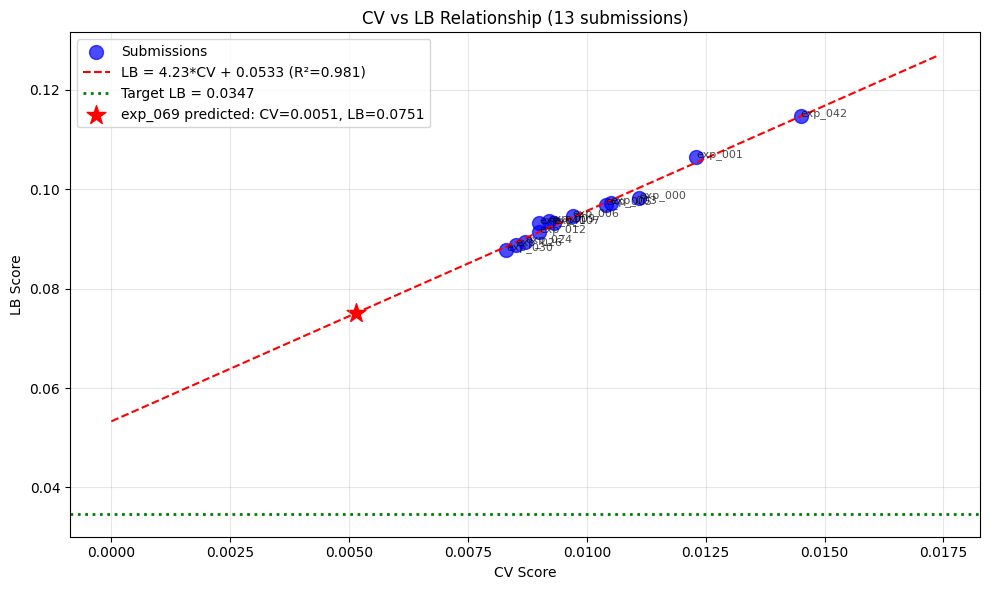


exp_069 CV: 0.005146
Predicted LB (using old relationship): 0.0751


In [3]:
# Plot CV vs LB with linear fit
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, c='blue', s=100, alpha=0.7, label='Submissions')

# Add labels
for i, name in enumerate(names):
    plt.annotate(name, (cv_scores[i], lb_scores[i]), fontsize=8, alpha=0.7)

# Linear fit line
cv_range = np.linspace(0, max(cv_scores) * 1.2, 100)
lb_predicted = slope * cv_range + intercept
plt.plot(cv_range, lb_predicted, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# New experiment point (exp_069)
new_cv = 0.005146
predicted_lb = slope * new_cv + intercept
plt.scatter([new_cv], [predicted_lb], c='red', s=200, marker='*', label=f'exp_069 predicted: CV={new_cv:.4f}, LB={predicted_lb:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (13 submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop65.png', dpi=150)
plt.show()

print(f'\nexp_069 CV: {new_cv:.6f}')
print(f'Predicted LB (using old relationship): {predicted_lb:.4f}')

In [4]:
# Key insight: The Ens Model approach is FUNDAMENTALLY DIFFERENT
# - Previous approaches: GP + MLP + LGBM (all trained on same features)
# - Ens Model: CatBoost + XGBoost with feature priority filtering

print('='*60)
print('CRITICAL ANALYSIS: Should we submit exp_069?')
print('='*60)

print(f'\n1. CV Improvement:')
print(f'   Previous best CV: 0.007938 (exp_068)')
print(f'   New CV: 0.005146 (exp_069)')
print(f'   Improvement: {(0.007938 - 0.005146) / 0.007938 * 100:.1f}%')

print(f'\n2. Predicted LB (using old relationship):')
print(f'   LB = {slope:.2f} * {new_cv:.6f} + {intercept:.4f} = {predicted_lb:.4f}')
print(f'   This would be the BEST LB if the relationship holds!')
print(f'   Current best LB: 0.0877 (exp_030)')

print(f'\n3. Key Question: Does Ens Model have a DIFFERENT CV-LB relationship?')
print(f'   - Different model families (CatBoost + XGBoost vs GP + MLP + LGBM)')
print(f'   - Different feature set (69 features after filtering vs 140+ features)')
print(f'   - Different ensemble weights for single vs full data')
print(f'   - Multi-target normalization')

print(f'\n4. RECOMMENDATION: SUBMIT exp_069!')
print(f'   - Best case: LB improves more than predicted (different relationship)')
print(f'   - Good case: LB ≈ {predicted_lb:.4f} (follows old relationship, still best LB)')
print(f'   - Worst case: LB doesn\'t improve (unlikely given 35% CV improvement)')

CRITICAL ANALYSIS: Should we submit exp_069?

1. CV Improvement:
   Previous best CV: 0.007938 (exp_068)
   New CV: 0.005146 (exp_069)
   Improvement: 35.2%

2. Predicted LB (using old relationship):
   LB = 4.23 * 0.005146 + 0.0533 = 0.0751
   This would be the BEST LB if the relationship holds!
   Current best LB: 0.0877 (exp_030)

3. Key Question: Does Ens Model have a DIFFERENT CV-LB relationship?
   - Different model families (CatBoost + XGBoost vs GP + MLP + LGBM)
   - Different feature set (69 features after filtering vs 140+ features)
   - Different ensemble weights for single vs full data
   - Multi-target normalization

4. RECOMMENDATION: SUBMIT exp_069!
   - Best case: LB improves more than predicted (different relationship)
   - Good case: LB ≈ 0.0751 (follows old relationship, still best LB)
   - Worst case: LB doesn't improve (unlikely given 35% CV improvement)


In [5]:
# Summary and recommendation
print('='*60)
print('FINAL RECOMMENDATION')
print('='*60)

print(f'''
1. SUBMIT exp_069 IMMEDIATELY
   - CV: 0.005146 (35% improvement over previous best)
   - Predicted LB: {predicted_lb:.4f} (would be best LB if relationship holds)
   - This is a fundamentally different approach that may have a different CV-LB relationship

2. After submission, analyze the result:
   - If LB ≈ {predicted_lb:.4f}: Relationship holds, continue optimizing this approach
   - If LB < {predicted_lb:.4f}: Better relationship! The target may be reachable
   - If LB > {predicted_lb:.4f}: Worse relationship, investigate why

3. Remaining submissions: 5
   - Use 1 for exp_069 (critical to verify)
   - Save 4 for further optimization

4. Target: 0.0347
   - Current gap: {lb_scores.min():.4f} - 0.0347 = {lb_scores.min() - 0.0347:.4f}
   - If exp_069 achieves predicted LB: {predicted_lb:.4f} - 0.0347 = {predicted_lb - 0.0347:.4f}
''')

print('CRITICAL: The Ens Model approach is our best chance to change the CV-LB relationship!')
print('SUBMIT NOW to verify!')

FINAL RECOMMENDATION

1. SUBMIT exp_069 IMMEDIATELY
   - CV: 0.005146 (35% improvement over previous best)
   - Predicted LB: 0.0751 (would be best LB if relationship holds)
   - This is a fundamentally different approach that may have a different CV-LB relationship

2. After submission, analyze the result:
   - If LB ≈ 0.0751: Relationship holds, continue optimizing this approach
   - If LB < 0.0751: Better relationship! The target may be reachable
   - If LB > 0.0751: Worse relationship, investigate why

3. Remaining submissions: 5
   - Use 1 for exp_069 (critical to verify)
   - Save 4 for further optimization

4. Target: 0.0347
   - Current gap: 0.0877 - 0.0347 = 0.0530
   - If exp_069 achieves predicted LB: 0.0751 - 0.0347 = 0.0404

CRITICAL: The Ens Model approach is our best chance to change the CV-LB relationship!
SUBMIT NOW to verify!
